In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from cycler import cycler

In [3]:
from matplotlib.ticker import FuncFormatter

In [4]:
import matplotlib.font_manager
from IPython.core.display import HTML

def make_html(fontname):
    return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)

code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])

HTML("<div style='column-count: 2;'>{}</div>".format(code))

In [5]:
pd.set_option('display.max_colwidth', 400)
pd.set_option('display.max_rows',4000)

In [6]:
df = pd.read_csv('UNdata_tobacco.csv')
df.head()

,Country or Area,Year,Commodity,Flow,Trade (USD),Weight (kg)
0,Afghanistan,2016,Cigarettes containing tobacco,Import,49111872.0,2629072.0
1,Afghanistan,2016,Homogenized or reconstituted tobacco,Import,1177842.0,NaN
2,Afghanistan,2015,Cigarettes containing tobacco,Import,87227851.0,4347904.0
3,Afghanistan,2015,Homogenized or reconstituted tobacco,Import,427504.0,106520.0
4,Afghanistan,2014,Cigarettes containing tobacco,Import,3984800.0,207074.0


In [7]:
df.columns = df.columns.str.replace('\s+', '_')

In [8]:
df.columns = df.columns.str.replace('(','_')

In [9]:
df.columns = df.columns.str.replace(')','_')

In [10]:
df.columns = df.columns.str.replace('Country_or_Area','Country_Area')
df.columns = df.columns.str.replace('Trade__USD_','USD')
df.columns = df.columns.str.replace('Weight__kg_','Weight')

In [11]:
df.head(1)

,Country_Area,Year,Commodity,Flow,USD,Weight
0,Afghanistan,2016,Cigarettes containing tobacco,Import,49111872.0,2629072.0


In [12]:
df.count()

Country_Area    48995
Year            48995
Commodity       48995
Flow            48995
USD             48995
Weight          48285
dtype: int64

In [13]:
df.Flow.value_counts()

Import       26829
Export       18849
Re-Export     2692
Re-Import      625
Name: Flow, dtype: int64

In [14]:
#df.groupby('Flow').Country_Area.value_counts().sort_values(ascending=False)

In [15]:
export_df = df[df.Flow.str.contains("Export", case=False, na=False)]
export_df.head()

,Country_Area,Year,Commodity,Flow,USD,Weight
14,Albania,2016,"Tobacco, unmanufactured, not stemmed or stripped",Export,183785.0,103767.0
15,Albania,2016,"Tobacco, unmanufactured, stemmed or stripped",Export,4110889.0,1323120.0
18,Albania,2016,Cigarettes containing tobacco,Export,694779.0,162157.0
24,Albania,2013,"Tobacco, unmanufactured, stemmed or stripped",Export,4603628.0,1205741.0
27,Albania,2013,Cigarettes containing tobacco,Export,1495582.0,309236.0


In [16]:
export_df.Commodity.value_counts()

Cigarettes containing tobacco                            3839
Cigarette or pipe tobacco and tobacco substitute mixe    2774
Cigars, cheroots and cigarillos, containing tobacco      2688
Tobacco, unmanufactured, stemmed or stripped             2598
Tobacco, unmanufactured, not stemmed or stripped         2523
Products of tobacco, substitute nes, extract, essence    2106
Cigars, cheroots, cigarettes, with tobacco substitute    1996
Tobacco refuse                                           1921
Homogenized or reconstituted tobacco                     1096
Name: Commodity, dtype: int64

In [17]:
pd.options.display.float_format = '{:.0f}'.format

In [18]:
df_2017 = export_df[export_df['Year']==2017]
df_2017.head()

,Country_Area,Year,Commodity,Flow,USD,Weight
198,Algeria,2017,Cigarettes containing tobacco,Export,11975,866
200,Algeria,2017,"Products of tobacco, substitute nes, extract, essence",Export,5809,410
821,Argentina,2017,"Tobacco, unmanufactured, not stemmed or stripped",Export,5629831,2276579
823,Argentina,2017,"Tobacco, unmanufactured, stemmed or stripped",Export,287135184,60726137
825,Argentina,2017,Tobacco refuse,Export,10458316,20653260


In [19]:
#LET'S REMOVE 'EU-28'
df_2017 = df_2017[df_2017.Country_Area != 'EU-28']
df_2017.head()

,Country_Area,Year,Commodity,Flow,USD,Weight
198,Algeria,2017,Cigarettes containing tobacco,Export,11975,866
200,Algeria,2017,"Products of tobacco, substitute nes, extract, essence",Export,5809,410
821,Argentina,2017,"Tobacco, unmanufactured, not stemmed or stripped",Export,5629831,2276579
823,Argentina,2017,"Tobacco, unmanufactured, stemmed or stripped",Export,287135184,60726137
825,Argentina,2017,Tobacco refuse,Export,10458316,20653260


In [20]:
usd_2017 = df_2017.groupby('Country_Area')['USD'].sum().reset_index(name='usd_2017')
top20_usd17 = usd_2017.sort_values(by='usd_2017', ascending=True).tail(20)
top20_usd17.tail()

,Country_Area,usd_2017
10,"China, Hong Kong SAR",1769986179
6,Brazil,2092160511
54,USA,3089718026
39,Poland,3340492853
18,Germany,4519131766


In [22]:
test = pd.merge(top20_usd17, df_2017, on='Country_Area')
test.head()
#test.groupby('Country_Area').USD.plot(kind='bar',stacked=True)

,Country_Area,usd_2017,Year,Commodity,Flow,USD,Weight
0,Philippines,277496260,2017,"Tobacco, unmanufactured, not stemmed or stripped",Export,12625948,3173914
1,Philippines,277496260,2017,"Tobacco, unmanufactured, stemmed or stripped",Export,80555506,51051988
2,Philippines,277496260,2017,Tobacco refuse,Export,7274059,5229190
3,Philippines,277496260,2017,"Cigars, cheroots and cigarillos, containing tobacco",Export,484461,37614
4,Philippines,277496260,2017,Cigarettes containing tobacco,Export,122726754,15951575


In [23]:
test_1 = test[['Country_Area', 'Commodity', 'USD']]
test_1.head()

,Country_Area,Commodity,USD
0,Philippines,"Tobacco, unmanufactured, not stemmed or stripped",12625948
1,Philippines,"Tobacco, unmanufactured, stemmed or stripped",80555506
2,Philippines,Tobacco refuse,7274059
3,Philippines,"Cigars, cheroots and cigarillos, containing tobacco",484461
4,Philippines,Cigarettes containing tobacco,122726754


In [24]:
#test_1.to_csv("test_1.csv", index=False)

In [56]:
by_commodity = test_1.groupby(['Country_Area','Commodity']).USD.median().unstack().reset_index().fillna(0)
by_commodity['total'] = by_commodity.sum(axis=1)
by_commodity.head(1)

Commodity,Country_Area,Cigarette or pipe tobacco and tobacco substitute mixe,Cigarettes containing tobacco,"Cigars, cheroots and cigarillos, containing tobacco","Cigars, cheroots, cigarettes, with tobacco substitute",Homogenized or reconstituted tobacco,"Products of tobacco, substitute nes, extract, essence",Tobacco refuse,"Tobacco, unmanufactured, not stemmed or stripped","Tobacco, unmanufactured, stemmed or stripped",total
0,Argentina,4835192,14169754,3384,0,2668,35500,10458316,5629831,287135184,322269830


In [57]:
by_commodity.sort_values(by='total',inplace=True)
by_commodity.head(1)

Commodity,Country_Area,Cigarette or pipe tobacco and tobacco substitute mixe,Cigarettes containing tobacco,"Cigars, cheroots and cigarillos, containing tobacco","Cigars, cheroots, cigarettes, with tobacco substitute",Homogenized or reconstituted tobacco,"Products of tobacco, substitute nes, extract, essence",Tobacco refuse,"Tobacco, unmanufactured, not stemmed or stripped","Tobacco, unmanufactured, stemmed or stripped",total
10,Philippines,5765834,122726754,484461,1449601,38192466,8421631,7274059,12625948,80555506,277496260


In [58]:
by_commodity.drop(columns='total',inplace=True)
by_commodity.head(1)

Commodity,Country_Area,Cigarette or pipe tobacco and tobacco substitute mixe,Cigarettes containing tobacco,"Cigars, cheroots and cigarillos, containing tobacco","Cigars, cheroots, cigarettes, with tobacco substitute",Homogenized or reconstituted tobacco,"Products of tobacco, substitute nes, extract, essence",Tobacco refuse,"Tobacco, unmanufactured, not stemmed or stripped","Tobacco, unmanufactured, stemmed or stripped"
10,Philippines,5765834,122726754,484461,1449601,38192466,8421631,7274059,12625948,80555506


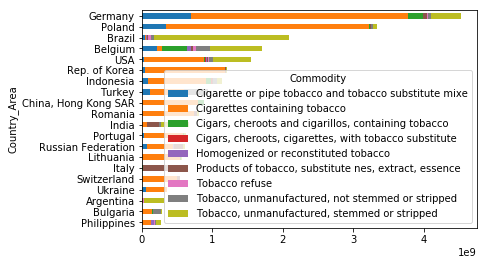

In [59]:
by_commodity.plot(kind='barh',x='Country_Area', stacked=True)

In [30]:
# test_1.pivot(index='Commodity',columns='Country_Area',values='USD')
# test_1

In [31]:
# test_1.pivot(index='Country_Area',columns='Commodity',values='USD')
# test_1

In [32]:
#long_df.pivot(index='year', columns='continent', values='visas').head()

In [33]:
# by_commodity = test.groupby('Country_Area').Commodity.value_counts().sort_index(ascending=False).unstack().reset_index().fillna(0)
# by_commodity.head()

In [34]:
test.Commodity.value_counts()

Tobacco, unmanufactured, stemmed or stripped             23
Cigarette or pipe tobacco and tobacco substitute mixe    22
Cigarettes containing tobacco                            22
Products of tobacco, substitute nes, extract, essence    21
Cigars, cheroots and cigarillos, containing tobacco      21
Tobacco refuse                                           20
Tobacco, unmanufactured, not stemmed or stripped         19
Homogenized or reconstituted tobacco                     15
Cigars, cheroots, cigarettes, with tobacco substitute    14
Name: Commodity, dtype: int64

In [36]:
#test.groupby('Country_Area').Commodity.value_counts()

In [37]:
#test[test['Commodity'] == 'Cigarette or pipe tobacco and tobacco substitute mixe']

In [38]:
# import numpy as np
# from matplotlib import rc


In [39]:
# rc('font', weight='bold')

In [40]:
# # Values of each group
# bars1 = [47142234, 28146464,100581600]
# bars2 = [3077966524	, 2883306103, 870849084]
# bars3 = [697079619, 339323740, 67197135]
# #bars4 = []

In [43]:
# # Heights of bars1 + bars2 (TO DO better)
# bars = [40, 35, 17] #, 12, 32]
 
# # The position of the bars on the x-axis
# r = [0,1,2,3] #,4]
 
# # Names of group and bar width
# names = ['A','B','C','D'] #,'E']
# barWidth = 1


In [44]:
# # Create brown bars
# plt.bar(r, bars1, color='#7f6d5f', edgecolor='white', width=barWidth)
# # Create green bars (middle), on top of the firs ones
# plt.bar(r, bars2, bottom=bars1, color='#557f2d', edgecolor='white', width=barWidth)
# # Create green bars (top)
# plt.bar(r, bars3, bottom=bars, color='#2d7f5e', edgecolor='white', width=barWidth)
 
# # Custom X axis
# plt.xticks(r, names, fontweight='bold')
# plt.xlabel("group")
 
# # Show graphic
# plt.show()


In [45]:
#test.Commodity.value_counts()

In [46]:
# test[test['Commodity'] == 'Tobacco, unmanufactured, stemmed or stripped'].USD

In [47]:
# ger_com = [47142234, 421106891, 6639470] #, 207915273, 3077966524, 176404, 697079619, 4916856, 56188495]
# bars1 = test[test['Commodity'] == 'Tobacco, unmanufactured, stemmed or stripped'].USD

In [48]:
# number = 47142234+421106891

In [49]:
# # Heights of bars1 + bars2 (TO DO better)
# bars = [number] #, 35, 17, 12, 32]
 
# # The position of the bars on the x-axis
# r = [0] #,1,2,3,4]

# names = ['Germany'] #,'B','C','D','E']
# barWidth = 0.03

# # Create brown bars
# plt.bar(r,47142234 , color='yellow', edgecolor='white', width=barWidth)
# # Create green bars (middle), on top of the firs ones
# plt.bar(r, 421106891, bottom=47142234, color='blue', edgecolor='white', width=barWidth)
# # Create green bars (top)
# plt.bar(r, 6639470, bottom=bars, color='#2d7f5e', edgecolor='white', width=barWidth)
 
# # Custom X axis
# plt.xticks(r, names, fontweight='bold')
# plt.xlabel("group")
 
# # Show graphic
# plt.show()




In [50]:
# by_commodity = test.groupby('Country_Area').Commodity.value_counts().unstack().reset_index().fillna(0)
# by_commodity

In [51]:
# ger = test[test['Country_Area'] == 'Germany']
# ger.plot

In [28]:
#colors = ['#423525','#AA552E','#586923','#AF0714','#86909A','#B08F70']

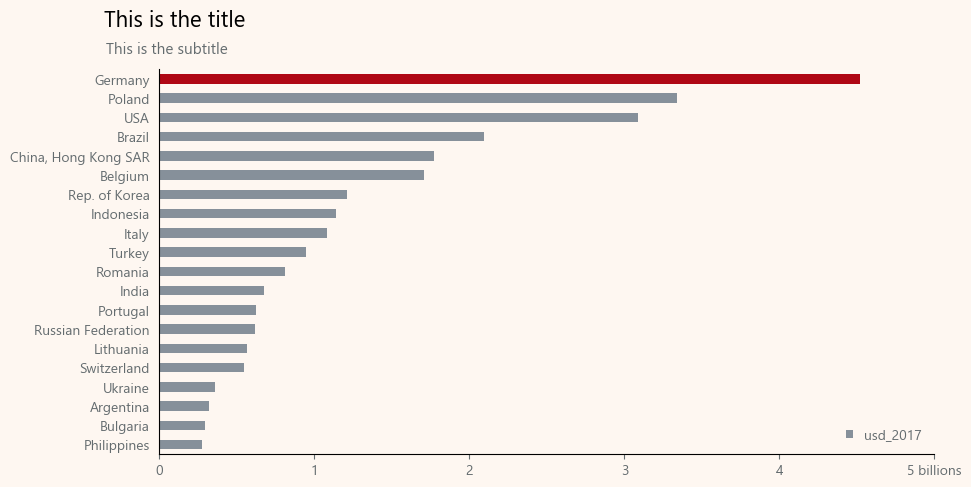

In [88]:
#color = plt.rcParams['axes.prop_cycle'].by_key()['color'][0]

def color(country):
    if country == 'Germany':
        return '#AF0714'
    else:
        return '#86909A'
    
bar_colors = [color(country) for country in top20_usd17.Country_Area]


# STEP ONE: Build a function
# it should take value and pos
def with_words(value, pos):
    billions = int(value / 1000000000)
    if billions == 5:
        return "{} billions".format(billions)
    else: 
        return "{}".format(billions)

# # STEP TWO: Use FuncFormatter with that function???
formatter = FuncFormatter(with_words)

# ax = world.plot(x='city', y='people', kind='bar')

# # STEP THREE: Give the axis your formatter
# ax.yaxis.set_major_formatter(formatter)


ax = top20_usd17.plot(kind='barh', x='Country_Area', y='usd_2017',figsize=(10, 5),color=bar_colors)
ax.xaxis.set_major_formatter(formatter)

#,'#AA552E','#586923','#AF0714','#86909A','#B08F70
# CUSTOMIZATION CODE GOES UNDER HERE

ax.set_xlabel('something',fontsize=12,fontname="Leelawadee UI")
ax.set_ylabel('something',fontsize=12,fontname="Leelawadee UI")
ax.axes.labelpad: 4.0
ax.xaxis.label.set_visible(False)
ax.yaxis.label.set_visible(False)
# ax.spines['top'].set_visible(False)
# ax.spines['left'].set_visible(False)
# ax.spines['bottom'].set_visible(True)
# ax.spines['right'].set_visible(False)
# ax.set_xticks([0,1,2,3,4,5])
# ax.set_xticklabels(['0','','1','','2','','3','','5 billion USD'],color='#646C6F')
ax.set_xlim(0,5000000000)

title_string = "This is the title"
subtitle_string = "This is the subtitle"
plt.suptitle(title_string, y=1, x=0.14, fontsize=16,color='black')
plt.title(subtitle_string, y=1.02, x=0.01, fontsize=11)

plt.rcdefaults()
plt.rcParams.update({
    #ERROR: 'NameError: name 'cycler' is not defined'
    'axes.prop_cycle': cycler('color', ['#423525', 'yellow', 'blue']),
    'axes.facecolor': '#FEF7F1',
    'savefig.facecolor': '#FEF7F1',
    'figure.facecolor': '#FEF7F1',
    'axes.spines.left': True,
    'axes.spines.bottom': True,
    'axes.spines.top': False,
    'axes.spines.right': False,
    #'axes.grid':True
#   'grid.color':'#ffffff',
#   'grid.linewidth':2,
#    'grid.alpha':0.6,
    'xtick.top': False,
    'xtick.bottom': True,
    'xtick.color': '#646C6F',
    'ytick.color':'#646C6F',
    #'ytick.bottom': True,
    #'ytick.color': 'black'
    #'xtick.major.size': 7,
    #'xtick.major.width': 3,
    #'xtick.major.pad': 0,
    #'xtick.direction': 'in',
    'xtick.labelsize': 'small',
    'ytick.labelsize': 'small',
    'legend.loc': 'best',
    'legend.frameon': False,
    'legend.fontsize': 'small',
    'legend.handlelength': 0.5,
    'legend.handleheight': 0.5,
    #'legend.columnspacing': 2.0,
    'font.family': 'Segoe UI Symbol',
    'font.size':12,
    'text.color':'#646C6F'
     })

# ax.set_xlabel('GDP per capita',fontsize=12,fontname="Leelawadee UI")
# ax.set_ylabel('Life expectancy',fontsize=12,fontname="Leelawadee UI")
# ax.axes.labelpad: 4.0

ax.tick_params(axis='y',left=False)

# then we save it
# plt.savefig("personal-graph-bar-one-color.pdf")
plt.show()

In [63]:
#top20_usd17.plot(kind='barh')

In [64]:
weight_2017 = df_2017.groupby('Country_Area')['Weight'].sum().reset_index(name='weight_2017')
top20_weight17 = weight_2017.sort_values(by='weight_2017',ascending=True).tail(20)
top20_weight17.head()

,Country_Area,weight_2017
40,Portugal,32197892
51,Switzerland,32666254
31,Malaysia,35984560
30,Lithuania,37361463
7,Bulgaria,41889947


In [65]:
merge = pd.merge(top20_usd17,weight_2017,on='Country_Area')
merge.head()

,Country_Area,usd_2017,weight_2017
0,Philippines,277496260,85363016
1,Bulgaria,292856146,41889947
2,Argentina,322269830,86333393
3,Ukraine,355730145,43353839
4,Switzerland,548545303,32666254


Country_Area
Argentina               AxesSubplot(0.125,0.11;0.775x0.77)
Belgium                 AxesSubplot(0.125,0.11;0.775x0.77)
Brazil                  AxesSubplot(0.125,0.11;0.775x0.77)
Bulgaria                AxesSubplot(0.125,0.11;0.775x0.77)
China, Hong Kong SAR    AxesSubplot(0.125,0.11;0.775x0.77)
Germany                 AxesSubplot(0.125,0.11;0.775x0.77)
India                   AxesSubplot(0.125,0.11;0.775x0.77)
Indonesia               AxesSubplot(0.125,0.11;0.775x0.77)
Italy                   AxesSubplot(0.125,0.11;0.775x0.77)
Lithuania               AxesSubplot(0.125,0.11;0.775x0.77)
Philippines             AxesSubplot(0.125,0.11;0.775x0.77)
Poland                  AxesSubplot(0.125,0.11;0.775x0.77)
Portugal                AxesSubplot(0.125,0.11;0.775x0.77)
Rep. of Korea           AxesSubplot(0.125,0.11;0.775x0.77)
Romania                 AxesSubplot(0.125,0.11;0.775x0.77)
Russian Federation      AxesSubplot(0.125,0.11;0.775x0.77)
Switzerland             AxesSubplot(0.125,0

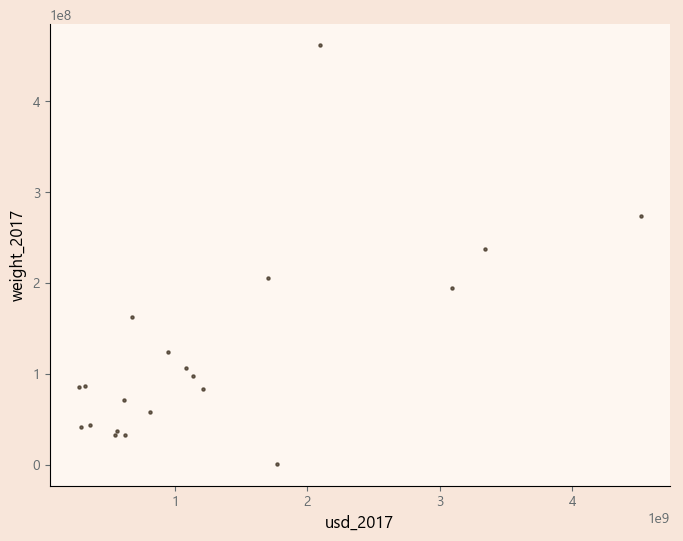

In [89]:
# fig, ax = plt.subplots(figsize=(8, 6))

# colors = list(reversed(plt.rcParams['axes.prop_cycle'].by_key()['color']))

# merge.groupby('Country_Area').plot(kind='scatter', x='usd_2017', y='weight_2017', color=colors.pop(), s=20, ax=ax, alpha=0.75)
#ax.legend_.remove()
plt.rcdefaults()
plt.rcParams.update({
    'axes.prop_cycle': cycler('color', ['#423525','#AA552E','#586923','#AF0714','#86909A','#B08F70']),
    'axes.facecolor': '#FEF7F1',
    'savefig.facecolor': '#F8E6DA',
    #'#F8E6DA',
    'figure.facecolor': '#F8E6DA',
    'axes.spines.left': True,
    'axes.spines.bottom': True,
    'axes.spines.top': False,
    'axes.spines.right': False,
#     'axes.grid':True
#     'grid.color':'#ffffff',
#     'grid.linewidth':2,
#     'grid.alpha':0.6,
    'xtick.top': False,
    'xtick.bottom': True,
    'xtick.color': '#646C6F',
    'ytick.color':'#646C6F',
    #'ytick.bottom': True,
    #'ytick.color': 'black'
    #'xtick.major.size': 7,
    #'xtick.major.width': 3,
    #'xtick.major.pad': 0,
    #'xtick.direction': 'in',
    'xtick.labelsize': 'small',
    'ytick.labelsize': 'small',
    #'legend.loc': 'best',
    #'legend.frameon': False,
    #'legend.columnspacing': 2.0,
    'font.family': 'Segoe UI Symbol',
    'font.size':12,
    'text.color':'#646C6F'
     })

# fig, ax = plt.subplots(figsize=(8, 6))

# # Don't touch this part of the code!
# colors = list(reversed(plt.rcParams['axes.prop_cycle'].by_key()['color']))

# groups = df.groupby('continent')
# for name, group in groups:
#     group.plot(kind='scatter', x='gdp_per_capita', y='life_expectancy', color=colors.pop(), label=name, s= 5 + (group.population / 200000), ax=ax, alpha=0.75)

fig, ax = plt.subplots(figsize=(8, 6))

colors = list(reversed(plt.rcParams['axes.prop_cycle'].by_key()['color']))

merge.groupby('Country_Area').plot(kind='scatter', x='usd_2017', y='weight_2017', color=colors.pop(), s=5, ax=ax, alpha=0.75)


#merge.groupby('Country_Area').plot(kind='scatter',x='usd_2017',y='weight_2017')

In [67]:
#merge.groupby('Country_Area').plot(kind='scatter',x='usd_2017',y='weight_2017'

In [68]:
df_2017.Weight.sum()

2735257753.456167

In [69]:
merge['weight_pct'] = (merge['weight_2017']/ df_2017.Weight.sum()) * 100
merge.head(1)

,Country_Area,usd_2017,weight_2017,weight_pct
0,Philippines,277496260,85363016,3


In [70]:
merge['ucd_pct'] = (merge['usd_2017']/ df_2017.USD.sum()) * 100
merge.head(1)

,Country_Area,usd_2017,weight_2017,weight_pct,ucd_pct
0,Philippines,277496260,85363016,3,1


In [74]:
usd_w_17 = merge[['Country_Area','usd_2017', 'weight_2017']]
usd_w_17.head(1)

,Country_Area,usd_2017,weight_2017
0,Philippines,277496260,85363016


In [84]:
usdw_pct_17 = merge[['Country_Area','weight_pct','ucd_pct']]
usdw_pct_17.head(1)

,Country_Area,weight_pct,ucd_pct
0,Philippines,3,1


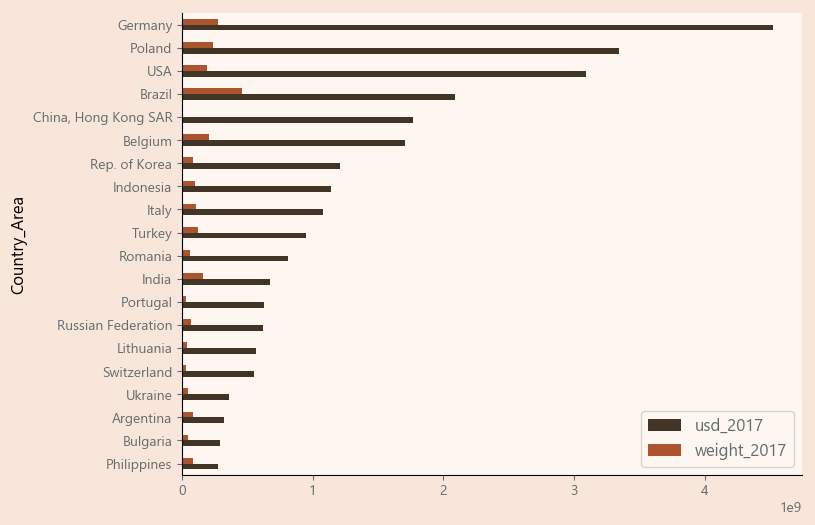

In [85]:
fig, ax = plt.subplots(figsize=(8,6))

usd_w_17.plot(kind='barh',x='Country_Area',ax=ax)

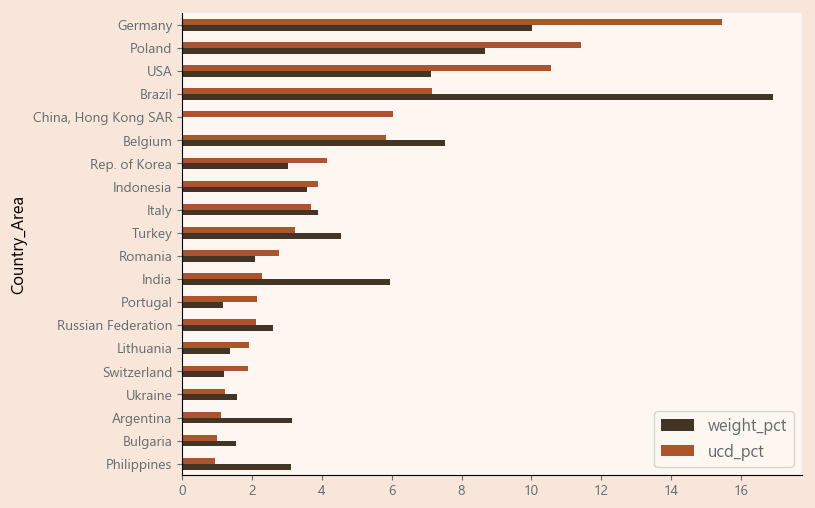

In [86]:
fig, ax = plt.subplots(figsize=(8,6))

usdw_pct_17.plot(kind='barh', x='Country_Area', ax=ax)

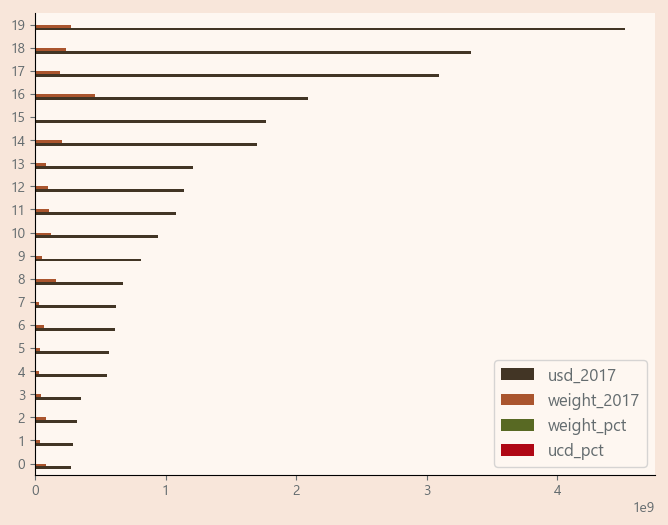

In [71]:
fig, ax = plt.subplots(figsize=(8, 6))

merge.plot(kind='barh', ax=ax)

In [72]:
germany = export_df[export_df['Country_Area']=='Germany']
germany.head()

,Country_Area,Year,Commodity,Flow,USD,Weight
16909,Germany,2017,"Tobacco, unmanufactured, not stemmed or stripped",Export,47142234,6208430
16911,Germany,2017,"Tobacco, unmanufactured, stemmed or stripped",Export,421106891,59851021
16913,Germany,2017,Tobacco refuse,Export,6639470,7110330
16915,Germany,2017,"Cigars, cheroots and cigarillos, containing tobacco",Export,207915273,4553525
16917,Germany,2017,Cigarettes containing tobacco,Export,3077966524,130394474


In [80]:
german_usd = germany.groupby('Year').USD.sum().reset_index(name='german_usd')
german_usd.head()

,Year,german_usd
0,1991,1248924008
1,1992,1450401968
2,1993,1240888008
3,1994,1420087040
4,1995,1450777032


In [81]:
german_weight = germany.groupby('Year').Weight.sum().reset_index(name='german_weight')
german_weight.head()

,Year,german_weight
0,1991,118757463
1,1992,116123440
2,1993,106608802
3,1994,128239999
4,1995,123111198


In [82]:
poland = export_df[export_df['Country_Area']=='Poland']
poland_usd = poland.groupby('Year').USD.sum().reset_index(name='poland_usd')
poland_usd.head()

,Year,poland_usd
0,1994,53496000
1,1995,26932001
2,1996,43555000
3,1997,47625674
4,1998,44607000


In [83]:
poland_weight = poland.groupby('Year').Weight.sum().reset_index(name='poland_weight')
poland_weight.head()

,Year,poland_weight
0,1994,6016000
1,1995,4982794
2,1996,10669728
3,1997,13164254
4,1998,13287925


In [84]:
usa = export_df[export_df['Country_Area']=='USA']
usa_usd = usa.groupby('Year').USD.sum().reset_index(name='usa_usd')
usa_usd.head()

,Year,usa_usd
0,1991,6044897602
1,1992,6194879623
2,1993,5607950732
3,1994,6811425912
4,1995,6714925325


In [85]:
usa_weight = usa.groupby('Year').USD.sum().reset_index(name='usa_weight')
usa_weight.head()

,Year,usa_weight
0,1991,6044897602
1,1992,6194879623
2,1993,5607950732
3,1994,6811425912
4,1995,6714925325


In [86]:
hist_usd = pd.merge(pd.merge(german_usd,poland_usd,on='Year'),usa_usd,on='Year')
hist_usd.head()

,Year,german_usd,poland_usd,usa_usd
0,1994,1420087040,53496000,6811425912
1,1995,1450777032,26932001,6714925325
2,1996,1681098798,43555000,6698720493
3,1997,1449310073,47625674,6665179625
4,1998,1643165032,44607000,6333127932


In [87]:
hist_w = pd.merge(pd.merge(german_weight,poland_weight,on='Year'),usa_weight,on='Year')
hist_w.head()

,Year,german_weight,poland_weight,usa_weight
0,1994,128239999,6016000,6811425912
1,1995,123111198,4982794,6714925325
2,1996,145286001,10669728,6698720493
3,1997,141665425,13164254,6665179625
4,1998,152201196,13287925,6333127932


In [34]:
hist_usd.plot(kind='line',x='Year')

In [88]:
colors = ['#423525','#AA552E','#586923']

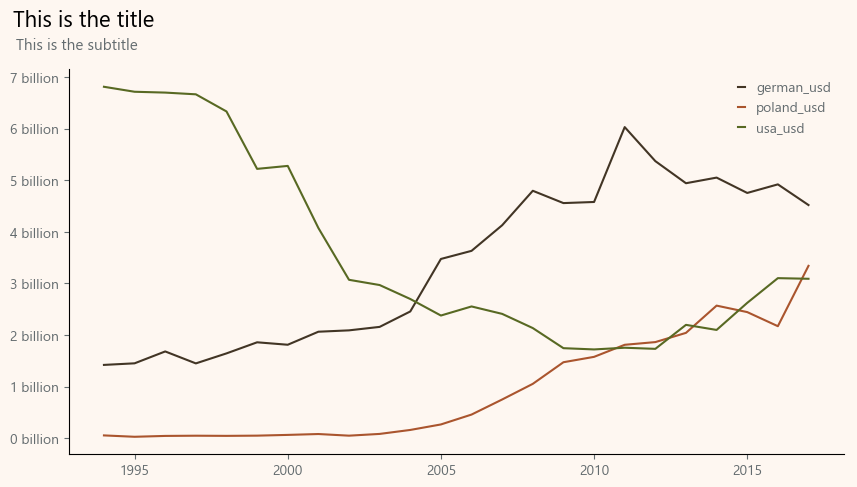

In [89]:
from matplotlib.ticker import FuncFormatter

# STEP ONE: Build a function
# it should take value and pos
def with_words(value, pos):
    billions = int(value / 1000000000)
    return "{} billion".format(billions)

# STEP TWO: Use FuncFormatter with that function???
formatter = FuncFormatter(with_words)

ax = hist_usd.plot(kind='line', x='Year', figsize=(10, 5), color=colors)

# STEP THREE: Give the axis your formatter
ax.yaxis.set_major_formatter(formatter)

#ax = hist_usd.plot(kind='line', x='Year', figsize=(10, 5), color=colors)

plt.rcdefaults()
plt.rcParams.update({
    #'axes.prop_cycle': cycler('color', ['#423525','#AA552E','#586923','#AF0714','#86909A','#B08F70']),
    'axes.facecolor': '#FEF7F1',
    'savefig.facecolor': '#FEF7F1',
    'figure.facecolor': '#FEF7F1',
    'axes.spines.left': True,
    'axes.spines.bottom': True,
    'axes.spines.top': False,
    'axes.spines.right': False,
#    'axes.grid':True
#   'grid.color':'#ffffff',
#   'grid.linewidth':2,
#    'grid.alpha':0.6,
    'xtick.top': False,
    'xtick.bottom': True,
    'xtick.color': '#646C6F',
    'ytick.color':'#646C6F',
    #'ytick.bottom': True,
    #'ytick.color': 'black'
    #'xtick.major.size': 7,
    #'xtick.major.width': 3,
    #'xtick.major.pad': 0,
    #'xtick.direction': 'in',
    'xtick.labelsize': 'small',
    'ytick.labelsize': 'small',
    'legend.loc': 'best',
     'legend.frameon': False,
     'legend.fontsize': 'small',
     'legend.handlelength': 0.5,
     'legend.handleheight': 0.5,
    #'legend.columnspacing': 2.0,
    'font.family': 'Segoe UI Symbol',
    'font.size':12,
    'text.color':'#646C6F'
     })


ax.set_xlabel('Visas by continent',fontsize=12,fontname="Segoe UI Symbol")
ax.set_ylabel("It's more than 15 years that South America has been coming first",fontsize=12,fontname="Segoe UI Symbol")
ax.axes.labelpad: 4.0
ax.xaxis.label.set_visible(False)
ax.yaxis.label.set_visible(False)
# ax.spines['top'].set_visible(False)
# ax.spines['left'].set_visible(True)
# ax.spines['bottom'].set_visible(True)
# ax.spines['right'].set_visible(False)
# ax.set_yticks([0,10,20,30,40,50,60])
# ax.set_yticklabels(['0','','20','','40','','60'],color='#646C6F')
# ax.set_xticks([1990,1991,1992,1993,1994,1995,2000,2005,2010,2015,2020])
# ax.set_yticklabels(['','1995','','2005','','2015',''],color='#646C6F')

title_string = "This is the title"
subtitle_string = "This is the subtitle"
plt.suptitle(title_string, y=1, x=0.14, fontsize=16,color='black')
plt.title(subtitle_string, y=1.03, x=0.01, fontsize=11)

plt.show()


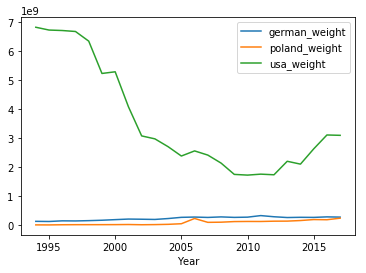

In [117]:
hist_w.plot(kind='line',x='Year')

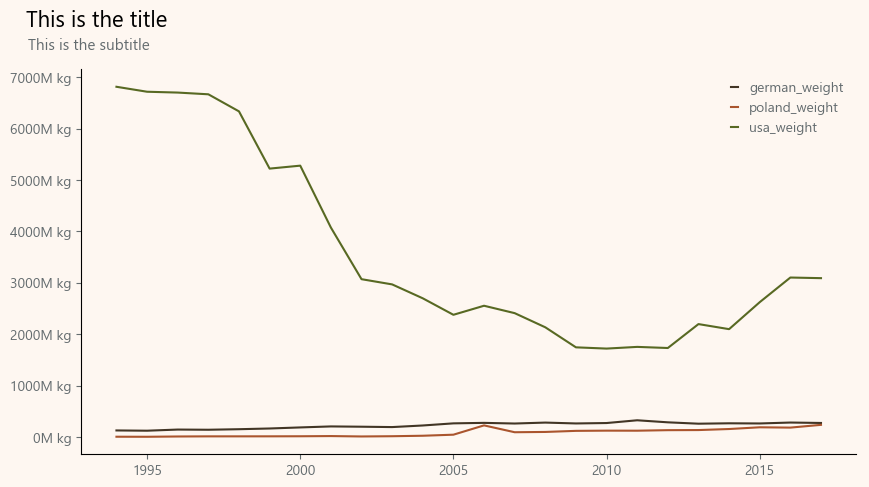

In [92]:
# STEP ONE: Build a function
# it should take value and pos
def with_words(value, pos):
    millions = int(value / 1000000)
    return "{}M kg".format(millions)

# STEP TWO: Use FuncFormatter with that function???
formatter = FuncFormatter(with_words)

# ax = hist_w.plot(kind='line', x='Year', figsize=(10, 5), color=colors)

# # STEP THREE: Give the axis your formatter
# ax.yaxis.set_major_formatter(formatter)


ax = hist_w.plot(kind='line', x='Year', figsize=(10, 5), color=colors)
ax.yaxis.set_major_formatter(formatter)

plt.rcdefaults()
plt.rcParams.update({
#    'axes.prop_cycle': cycler('color', ['#423525','#AA552E','#586923','#AF0714','#86909A','#B08F70']),
    'axes.facecolor': '#FEF7F1',
    'savefig.facecolor': '#FEF7F1',
    'figure.facecolor': '#FEF7F1',
    'axes.spines.left': True,
    'axes.spines.bottom': True,
    'axes.spines.top': False,
    'axes.spines.right': False,
#    'axes.grid':True
#   'grid.color':'#ffffff',
#   'grid.linewidth':2,
#    'grid.alpha':0.6,
    'xtick.top': False,
    'xtick.bottom': True,
    'xtick.color': '#646C6F',
    'ytick.color':'#646C6F',
    #'ytick.bottom': True,
    #'ytick.color': 'black'
    #'xtick.major.size': 7,
    #'xtick.major.width': 3,
    #'xtick.major.pad': 0,
    #'xtick.direction': 'in',
    'xtick.labelsize': 'small',
    'ytick.labelsize': 'small',
    'legend.loc': 'best',
     'legend.frameon': False,
     'legend.fontsize': 'small',
     'legend.handlelength': 0.5,
     'legend.handleheight': 0.5,
    #'legend.columnspacing': 2.0,
    'font.family': 'Segoe UI Symbol',
    'font.size':12,
    'text.color':'#646C6F'
     })


ax.set_xlabel('Visas by continent',fontsize=12,fontname="Segoe UI Symbol")
ax.set_ylabel("It's more than 15 years that South America has been coming first",fontsize=12,fontname="Segoe UI Symbol")
ax.axes.labelpad: 4.0
ax.xaxis.label.set_visible(False)
ax.yaxis.label.set_visible(False)
# ax.spines['top'].set_visible(False)
# ax.spines['left'].set_visible(True)
# ax.spines['bottom'].set_visible(True)
# ax.spines['right'].set_visible(False)
# ax.set_yticks([0,10,20,30,40,50,60])
# ax.set_yticklabels(['0','','20','','40','','60'],color='#646C6F')
# ax.set_xticks([1990,1991,1992,1993,1994,1995,2000,2005,2010,2015,2020])
# ax.set_yticklabels(['','1995','','2005','','2015',''],color='#646C6F')

title_string = "This is the title"
subtitle_string = "This is the subtitle"
plt.suptitle(title_string, y=1, x=0.14, fontsize=16,color='black')
plt.title(subtitle_string, y=1.03, x=0.01, fontsize=11)

plt.show()
